<a href="https://colab.research.google.com/github/pedrohortencio/machine-learning-gladiator/blob/main/House%20Prices/House_Prices_Gladiator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> _"Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price."_

Metric of Evaluation in [Kaggle's Competition Page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation).

[Full Ames Housing Dataset, compiled by Dean De Cock](http://jse.amstat.org/v19n3/decock/AmesHousing.txt)
[Ames, Iowa: Alternative to the Boston Housing Data as an
End of Semester Regression Project (Dean De Cock)](http://jse.amstat.org/v19n3/decock.pdf)

## Downloading the Dataset and Importing Libraries

In [72]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import xgboost as xg
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping


dict_rmse = {}

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Normalizer

pd.set_option("display.max_columns", 250)

In [74]:
df = pd.read_table("http://jse.amstat.org/v19n3/decock/AmesHousing.txt")

In [75]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,

In [76]:
df.sample(3)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1148,1149,531452140,120,RL,55.0,7892,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,TwnhsE,1Story,6,5,1993,1993,Gable,CompShg,Plywood,Plywood,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,300.0,Unf,0.0,899.0,1199.0,GasA,Ex,Y,SBrkr,1199,0,0,1199,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1993.0,RFn,2.0,530.0,TA,TA,Y,0,63,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,153900
960,961,916382110,20,RL,79.0,14463,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,1Story,9,5,2008,2008,Gable,CompShg,CemntBd,CmentBd,BrkFace,406.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1115.0,Unf,0.0,526.0,1641.0,GasA,Ex,Y,SBrkr,1641,0,0,1641,1.0,0.0,2,0,3,1,Ex,7,Typ,0,NaN,Attchd,2008.0,Fin,3.0,885.0,TA,TA,Y,0,95,0,0,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal,316500
2036,2037,903457040,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,5,1915,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,Fa,No,LwQ,375.0,Unf,0.0,763.0,1138.0,GasA,Gd,Y,SBrkr,1138,1042,0,2180,0.0,0.0,1,1,3,1,TA,7,Typ,1,Gd,Detchd,2006.0,Unf,2.0,720.0,TA,TA,N,0,0,170,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,161000


In [77]:
df.shape

(2930, 82)

## Exploratory Data Analysis

>"I went through this process and concluded that the following variables can play an important role in this problem:
>
>* OverallQual (which is a variable that I don't like because I don't know how it was computed; a funny exercise would be to predict 'OverallQual' using all the other variables available).
* YearBuilt.
* TotalBsmtSF.
* GrLivArea."

[Kaggle Kernel](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)

In [78]:
#descriptive statistics summary
df['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

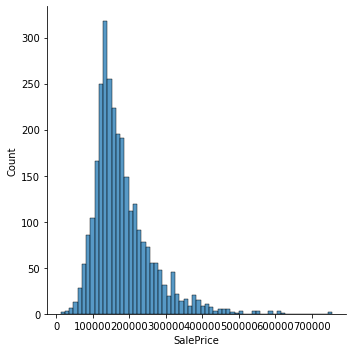

In [79]:
#histogram
sns.displot(df['SalePrice']);

In [80]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.743500
Kurtosis: 5.118900


----------

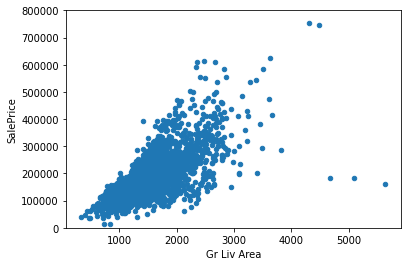

In [81]:
#bivariate analysis saleprice/grlivarea
var = 'Gr Liv Area'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [82]:
#deleting points
df.sort_values(by = 'Gr Liv Area', ascending = False)[:2]
df = df.drop(df[df['Order'] == 1299].index)
df = df.drop(df[df['Order'] == 524].index)

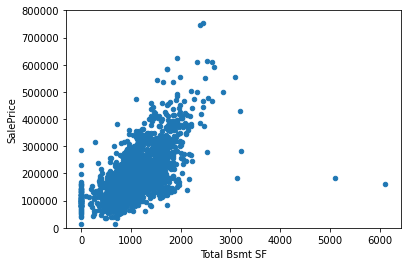

In [83]:
#bivariate analysis saleprice/grlivarea
var = 'Total Bsmt SF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it.

---------------

Missing Values

In [84]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Pool QC,2915,0.995560
Misc Feature,2822,0.963798
Alley,2731,0.932719
Fence,2356,0.804645
Fireplace Qu,1421,0.485314
Lot Frontage,490,0.167350
Garage Qual,158,0.053962
Garage Yr Blt,158,0.053962
Garage Cond,158,0.053962
Garage Finish,158,0.053962


In [85]:
#dealing with missing data
df = df.drop((missing_data[missing_data['Total'] > 1]).index,1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max() #just checking that there's no missing data missing...


1

-----------------

In [86]:
#convert categorical variable into dummy
df = pd.get_dummies(df)

In [87]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

print("Before cleaning:", df.shape)
df = clean_dataset(df)
df.drop(["Order", "PID"], axis=1, inplace=True)
print("After cleaning:", df.shape)

Before cleaning: (2927, 232)
After cleaning: (2925, 230)


In [88]:
df.sample(3)

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
1767,60.0,21535.0,10.0,6.0,1994.0,1995.0,1455.0,0.0,989.0,2444.0,2444.0,1872.0,0.0,4316.0,3.0,1.0,4.0,1.0,10.0,2.0,3.0,832.0,382.0,50.0,0.

## Creating the Models

In [89]:
y = df['SalePrice'].to_numpy()
df.drop('SalePrice', axis=1, inplace=True)

scaler = Normalizer()
df.iloc[:,:] = scaler.fit_transform(df.iloc[:,:].to_numpy())

X = df.to_numpy()

In [90]:
df.sample(3)

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
2757,0.001400,0.936576,0.000420,0.000350,0.140448,0.140448,0.110342,0.0,0.018204,0.128546,0.129246,0.0,0.0,0.129246,0.000140,0.0,0.000210,0.000070,0

In [91]:
print(df.shape)
print(X.shape)
print(y.shape)

(2925, 229)
(2925, 229)
(2925,)


In [92]:
(X_train, X_test, 
 y_train, y_test) = train_test_split(X, y, random_state=0)

In [93]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2193, 229)
(2193,)
(732, 229)
(732,)


### XGBoost

In [94]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror')
xgb_r.fit(X_train, y_train)

pred = xgb_r.predict(X_test)

rmse = MSE(y_test, pred, squared=False)
dict_rmse["XGBoost"] = rmse

print("XGBoost RMSE Score: % f" %(rmse)) 

XGBoost RMSE Score:  32443.603011


### Linear Regression

In [95]:
linear_reg = LinearRegression(fit_intercept=False)
linear_reg.fit(X_train, y_train)

pred = linear_reg.predict(X_test)

rmse = MSE(y_test, pred, squared=False)
dict_rmse["Linear Regression"] = rmse

print("Linear Regression RMSE Score: % f" %(rmse)) 

Linear Regression RMSE Score:  42309.740835


### Random Forest Regressor

In [96]:
rfr = RandomForestRegressor(n_estimators=200, min_samples_split=3, min_samples_leaf=3)
rfr.fit(X_train, y_train)

pred = rfr.predict(X_test)

rmse = MSE(y_test, pred, squared=False)
dict_rmse["Random Forest"] = rmse

print("Random Forest RMSE Score: % f" %(rmse)) 

Random Forest RMSE Score:  34143.428420


### Neural Network

In [97]:
model = Sequential([Dense(1024, activation='selu', kernel_initializer='normal'),

                    Dense(512, activation='selu', kernel_initializer='normal'),

                    Dense(512, activation='selu', kernel_initializer='normal'),

                    Dense(512, activation='selu', kernel_initializer='normal'),

                    Dense(256, activation='selu', kernel_initializer='normal'),

                    Dense(128, activation='selu', kernel_initializer='normal'),
                                    
                    Dense(1, activation='linear', kernel_initializer='normal')])

model.compile(optimizer = tf.optimizers.Adam(),
            loss = "mse",
            metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [98]:
loss_callback = EarlyStopping(monitor='val_loss', patience=10)

In [99]:
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=loss_callback)

Epoch 1/500
55/55 [==============================] - 4s 6ms/step - loss: 36002565046.8571 - root_mean_squared_error: 188659.9883 - val_loss: 5500175360.0000 - val_root_mean_squared_error: 74163.1641
Epoch 2/500
55/55 [==============================] - 0s 4ms/step - loss: 6382036672.0000 - root_mean_squared_error: 79761.7882 - val_loss: 4968229376.0000 - val_root_mean_squared_error: 70485.6641
Epoch 3/500
55/55 [==============================] - 0s 4ms/step - loss: 5949822985.1429 - root_mean_squared_error: 76707.1844 - val_loss: 4902874112.0000 - val_root_mean_squared_error: 70020.5234
Epoch 4/500
55/55 [==============================] - 0s 4ms/step - loss: 5051117686.8571 - root_mean_squared_error: 71018.5424 - val_loss: 3418631424.0000 - val_root_mean_squared_error: 58469.0625
Epoch 5/500
55/55 [==============================] - 0s 3ms/step - loss: 3060319424.0000 - root_mean_squared_error: 55286.8977 - val_loss: 2291054080.0000 - val_root_mean_squared_error: 47864.9570
Epoch 6/500
5

In [100]:
### Now that the Neural Network is done, I'll train it again with the whole data:

model.compile(optimizer = tf.optimizers.Adam(),
            loss = "mse",
            metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs=150, batch_size=32)  

Epoch 1/150
69/69 [==============================] - 1s 3ms/step - loss: 1581884710.4000 - root_mean_squared_error: 39569.0545
Epoch 2/150
69/69 [==============================] - 0s 3ms/step - loss: 1324867616.9143 - root_mean_squared_error: 36369.3183
Epoch 3/150
69/69 [==============================] - 0s 3ms/step - loss: 1326959665.3714 - root_mean_squared_error: 36418.5718
Epoch 4/150
69/69 [==============================] - 0s 3ms/step - loss: 1285686470.4000 - root_mean_squared_error: 35817.6362
Epoch 5/150
69/69 [==============================] - 0s 2ms/step - loss: 1420779638.8571 - root_mean_squared_error: 37672.9080
Epoch 6/150
69/69 [==============================] - 0s 3ms/step - loss: 1354804227.2000 - root_mean_squared_error: 36732.5299
Epoch 7/150
69/69 [==============================] - 0s 3ms/step - loss: 1315768524.8000 - root_mean_squared_error: 36231.9535
Epoch 8/150
69/69 [==============================] - 0s 2ms/step - loss: 1429888985.6000 - root_mean_squared_er

In [101]:
dnn_stats = model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 2ms/step - loss: 934587136.0000 - root_mean_squared_error: 30571.0176


In [103]:
test_rmse = dnn_stats[-1]  

dict_rmse['Neural Network'] = test_rmse 

##Plotting

In [107]:
import seaborn as sns
sns.set_theme()

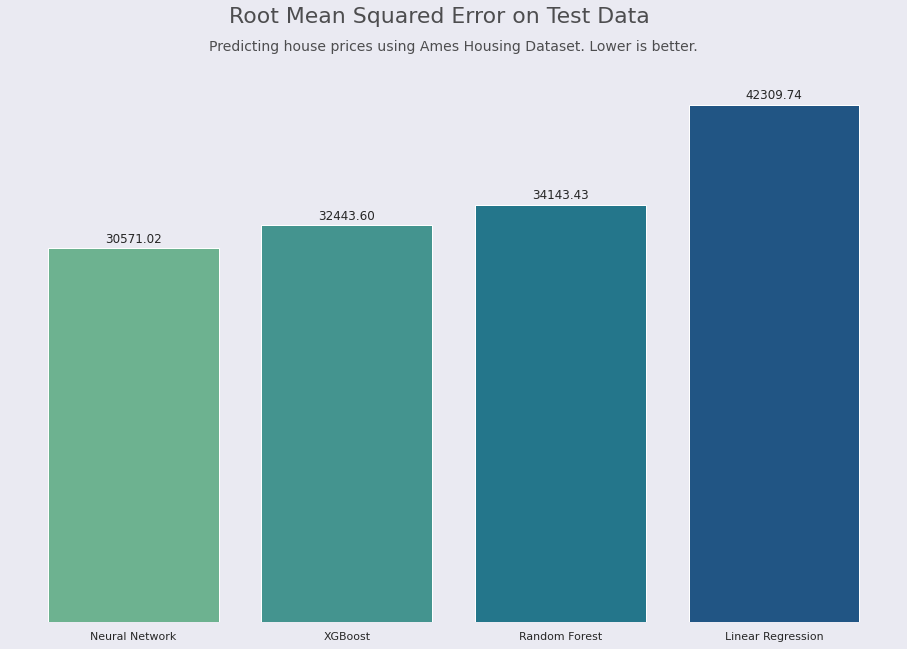

In [120]:
fig = plt.figure(figsize=(16,10))   # changes the size of the image
fig.patch.set_facecolor('#eaeaf2')  # set the background color of the plot to match the seaborn theme

ax = plt.gca()  # create an axes
width = 0.35

# The plot (barplot) is created and stored in the rects1 variable
rects1 = ax.bar(*zip(*sorted(dict_rmse.items(), key=lambda x: x[1], reverse=False)), color = sns.color_palette("crest", n_colors=4))

# For every bar in the plot
for r1 in rects1.patches:
    #get the height
    h1 = r1.get_height()
    
    # create a percentage
    percent = h1#int(h1)
    
    # and annotate the perceentage number on top of the bar
    ax.annotate('{:.2f}'.format(percent),
                    xy=(r1.get_x() + r1.get_width() / 2, h1),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Rotate the X labels (models' names)
#plt.xticks(rotation=30, rotation_mode="anchor", ha='right')
plt.box(False)  # disable the box around the plot
ax.grid(False)  # disable the grid
ax.set_yticks([])   # disable the y ticks

#print(*ax.get_xlim())  # gives the x limits


# creating a title
plt.suptitle('Root Mean Squared Error on Test Data',
          size=22, alpha=0.8)

plt.title('Predicting house prices using Ames Housing Dataset. Lower is better.',
          size=14, alpha=0.8, y=1.04)

# saves the plot
plt.savefig("rmse-test.png", bbox_inches='tight', dpi=300)
# displays the plot
plt.show();